In [4]:
#import modules
import numpy as np
import numpy.random as npr
import scipy.stats as sps
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statsmodels.formula.api as smi 

In [5]:
#Setting the Parameters
N = 1000 #sample size
B = 1500 #bootstrap sample size ie number of replication
a = 1  #true interpcept
b = 0.5 #true slope
s = 0.4 #true standard deviation

In [6]:
#Simulate the Data
e = sps.norm.rvs(size=N,loc=0, scale=s) #simulating residual vector
x = sps.norm.rvs(size=N,loc=2,scale=1) #simulating explanatory variable
y = a+b*x+e #constructing dependent variable
m = pd.DataFrame(np.c_[y,x], columns=['y','x']) #constructing dataset

In [7]:
#Estimate the parameters using statsmodels
ols_main = smi.ols('y~1+x', data=m).fit() #estimating linear regression based on simulated dataset
ols_main.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     1859.
Date:                Wed, 20 Jul 2016   Prob (F-statistic):          3.71e-230
Time:                        22:18:25   Log-Likelihood:                -460.59
No. Observations:                1000   AIC:                             925.2
Df Residuals:                     998   BIC:                             935.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.9841      0.026     37.455      0.000         0.933     1.036
x              0.5046      0.012     43.115      0.000         0.482     0.528
==============================================================================
Omnibus:                        1.455   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.483   Jarque-Bera (JB):                1.517
Skew:                           0.067   Prob(JB):                        0.468
Kurtosis:                       2.864   Cond. No.                         5.64
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
#setting things up for boostrap
coef = np.zeros((B,2)) #initiate vector to store bootstrapped coefficient estiamtes. 

In [9]:
#A bootstrap procedure
#Construct the bootstrap sample then estimate the parameter vector. 
for j in range(0,B):
    index = npr.choice(range(0,N), size=N, replace=True) #construct index set for bootstrap sample. 
    bootsample = m.iloc[list(index), :] #extract bootstrap sample. 
    ols_temp = smi.ols('y~1+x', data=bootsample).fit() #estimate regression based on bootstrap sample
    coef[j] = ols_temp.params.reshape((1,2)) #store bootstrap estimate

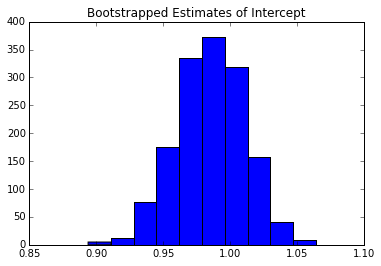

In [10]:
plt.hist(coef[:,0])
plt.title("Bootstrapped Estimates of Intercept")

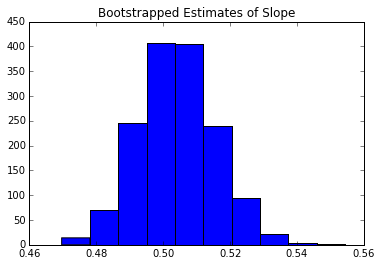

In [11]:
plt.hist(coef[:,1])
plt.title("Bootstrapped Estimates of Slope")

In [12]:
#Calculate the variance-covariance matrix
tempx = np.c_[np.ones(N), x]
cov = np.power(s,2)*np.linalg.inv(np.dot(tempx.transpose(), tempx))
truecov = np.diag(cov)

In [13]:
cov

array([[ 0.00074935, -0.00029604],
       [-0.00029604,  0.0001487 ]])

In [14]:
truecov

array([ 0.00074935,  0.0001487 ])

In [15]:
#Putting the result into Pandas for pretty printing
summary = np.c_[truecov.reshape((2,1)), np.diag(ols_main.cov_params()).reshape((2,1)), np.array([sps.tvar(coef[:,i]) for i in range(0,2)]).reshape((2,1))]
summary = np.r_[np.c_[np.r_[a,b], ols_main.params.reshape((2,1)), np.array([sps.tmean(coef[:,i]) for i in range(0,2)]).reshape((2,1))], summary]
header = ['Theoretical', 'Sample Estimate', 'Bootstrap Estiamte']
labelx = ['a','b','var a', 'var b']
result = pd.DataFrame(summary, columns=header, index=labelx)
print(result)

       Theoretical  Sample Estimate  Bootstrap Estiamte
a         1.000000         0.984073            0.985296
b         0.500000         0.504618            0.504207
var a     0.000749         0.000690            0.000653
var b     0.000149         0.000137            0.000131
